Investigation of mean interaction at fixed genomic distance in 1NP, 3NP datasets

In [1]:
import numpy as np
import pandas as pd
import sys
sys.path.insert(1, '/home/federico/Università/Tesi_magistrale/my_programs/')

from contact_matrix_utils import *
from settings import *
from src.slice_pairwise import *
from src.interchromosomal_cosegregation import *
from src.slice_pairwise_inter import *
from numpy.random import Generator, MT19937
from scipy.stats import pearsonr, spearmanr
from scipy.spatial.distance import squareform

plt.style.use('default')

In [2]:
output_figure_directory = "/home/federico/Università/Tesi_magistrale/images/interaction_vs_genomic_distance.ipynb_output/"

# Data preparation and info #

In [5]:
name_root_1NP_1Mb = "mesc_46C_1Mb_481x1"
name_root_3NP_1Mb = "iza-mesc_1Mb_420x3"


path_1 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_1NP_1Mb + "/"
file_name_1 = "segregation_" + name_root_1NP_1Mb +  ".pkl"
with open(path_1 + file_name_1, 'rb') as f_1:
    segregation_table_1NP = pickle.load(f_1)

path_2 =      r"/home/federico/Università/Tesi_magistrale/SLICE/slice_repository/data/" + name_root_3NP_1Mb + "/"
file_name_2 = "segregation_" + name_root_3NP_1Mb +  ".pkl"
with open(path_2 + file_name_2, 'rb') as f_2:
    segregation_table_3NP = pickle.load(f_2)

gw_coseg_matrix_1NP, gw_norm_link_disq_1NP = compute_coseg_nld_genomewide(segregation_table_1NP, 1, 19)
gw_coseg_matrix_3NP, gw_norm_link_disq_3NP = compute_coseg_nld_genomewide(segregation_table_3NP, 1, 19)


#gw_coseg_matrix_1NP = np.nan_to_num(gw_coseg_matrix_1NP, nan=0)
#gw_coseg_matrix_3NP = np.nan_to_num(gw_coseg_matrix_3NP, nan=0)

#gw_norm_link_disq_1NP = np.nan_to_num(gw_norm_link_disq_1NP, nan=0)
#gw_norm_link_disq_3NP = np.nan_to_num(gw_norm_link_disq_3NP, nan=0)


In [6]:
start_chr, stop_chr = 1, 19
stop_chr += 1
chromosomes = []
n_chromosomes = stop_chr - start_chr

l = []
size = 0

for i in range(start_chr, stop_chr):
    chrA = 'chr' + str(i)
    chromosomes += [chrA]
    s = segregation_table_1NP[chrA]['segregation_table'].shape[0]
    size += s
    l.append(s) 

chr_windows_sizes = np.array(l)

for i in range(gw_coseg_matrix_1NP.shape[0]):
    for j in range(gw_coseg_matrix_1NP.shape[1]):
        gw_coseg_matrix_1NP[j,i] = gw_coseg_matrix_1NP[i,j]
        gw_norm_link_disq_1NP[j,i] = gw_norm_link_disq_1NP[i, j] 

for i in range(gw_coseg_matrix_3NP.shape[0]):
    for j in range(gw_coseg_matrix_3NP.shape[1]):
        gw_coseg_matrix_3NP[j,i] = gw_coseg_matrix_3NP[i,j]
        gw_norm_link_disq_3NP[j,i] = gw_norm_link_disq_3NP[i, j] 

# Studio l'andamento medio dei contatti con la distanza genomica #

In [7]:
import warnings

In [8]:
def means_along_diagonals(mat):
    s = mat.shape[0]
    means_along_diagonals = np.zeros(s)
    for i in range(s):
        means_along_diagonals[i] = np.nanmean( np.diagonal(mat, offset=i) )
    return means_along_diagonals

## Dati GAM 1NP ##

/home/federico/miniconda3/envs/gam-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


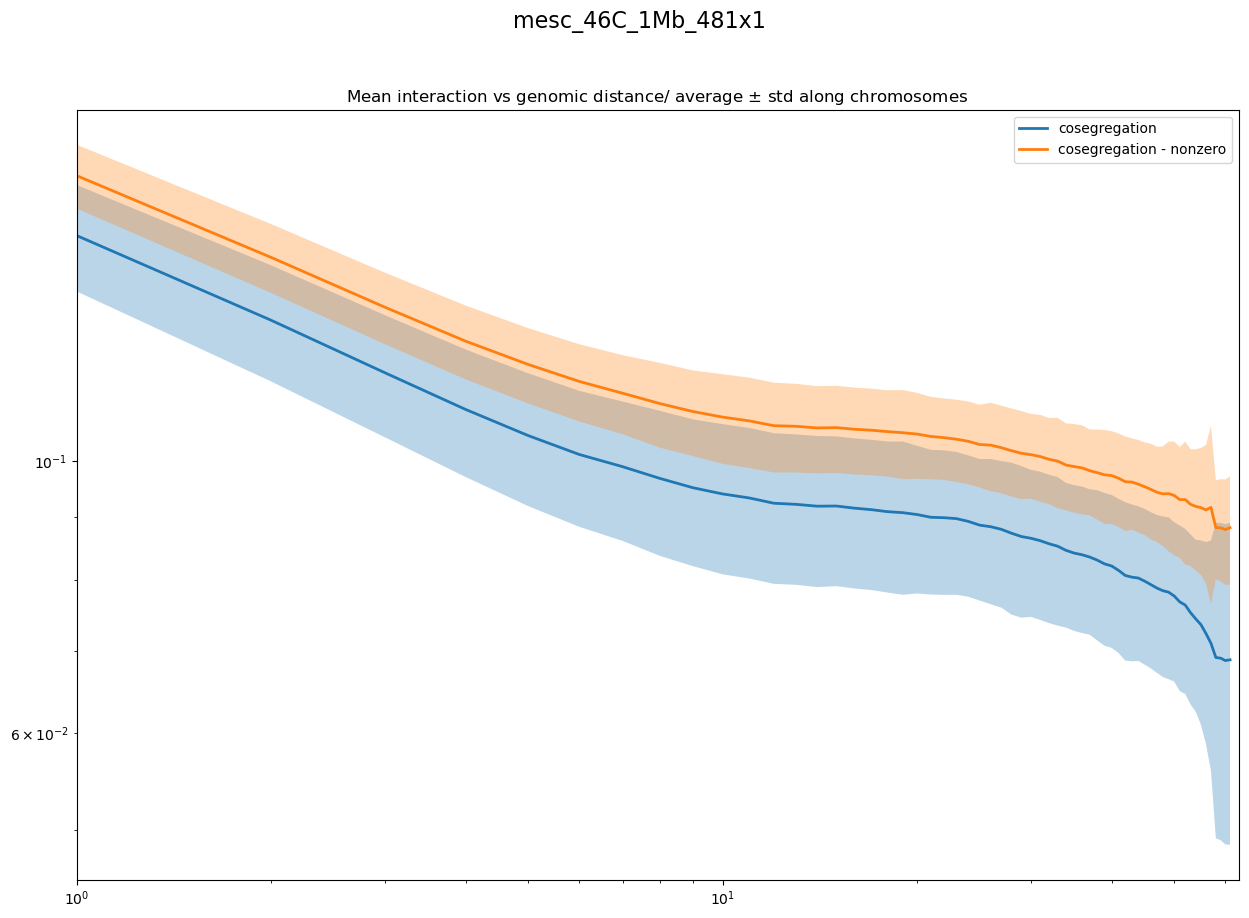

In [15]:
fig, ax = plt.subplots( figsize = (15, 10))
L_coseg = []
L_nld   = []
L_coseg_nonzero = []
L_nld_nonzero   = []

with warnings.catch_warnings():

    warnings.filterwarnings("ignore", "Mean of empty slice", category=RuntimeWarning)
    for i in range(n_chromosomes):
        
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]

        arr_1 = means_along_diagonals(gw_coseg_matrix_1NP[start_row:stop_row, start_row:stop_row])
        arr_2 = means_along_diagonals(gw_norm_link_disq_1NP[start_row:stop_row, start_row:stop_row])

        temp_1 = np.copy(gw_coseg_matrix_1NP[start_row:stop_row, start_row:stop_row])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_norm_link_disq_1NP[start_row:stop_row, start_row:stop_row])
        temp_2[temp_2== 0] = np.nan

        arr_3 = means_along_diagonals( temp_1 )
        arr_4 = means_along_diagonals( temp_2 )

        L_coseg.append(arr_1[:chr_windows_sizes[-1]])
        L_nld.append(arr_2[:chr_windows_sizes[-1]])
        L_coseg_nonzero.append(arr_3[:chr_windows_sizes[-1]])
        L_nld_nonzero.append(arr_4[:chr_windows_sizes[-1]])
        
        #gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column].flatten()
    del temp_1, temp_2

    arr_coseg_1NP = np.array(L_coseg)
    arr_nld_1NP = np.array(L_nld)
    arr_coseg_nonzero_1NP = np.array(L_coseg_nonzero)
    arr_nld_nonzero_1NP = np.array(L_nld_nonzero)


    del L_coseg, L_nld, L_coseg_nonzero, L_nld_nonzero

    arr_coseg_mean_1NP, arr_coseg_std_1NP = np.nanmean(arr_coseg_1NP, axis = 0), np.nanstd(arr_coseg_1NP, axis = 0)
    arr_nld_mean_1NP, arr_nld_std_1NP = np.nanmean(arr_nld_1NP, axis = 0), np.nanstd(arr_nld_1NP, axis = 0)
    arr_coseg_mean_nonzero_1NP, arr_coseg_std_nonzero_1NP = np.nanmean(arr_coseg_nonzero_1NP, axis = 0), np.nanstd(arr_coseg_nonzero_1NP, axis = 0)
    arr_nld_mean_nonzero_1NP, arr_nld_std_nonzero_1NP = np.nanmean(arr_nld_nonzero_1NP, axis = 0), np.nanstd(arr_nld_nonzero_1NP, axis = 0)

    del arr_coseg_1NP, arr_nld_1NP, arr_coseg_nonzero_1NP, arr_nld_nonzero_1NP

ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_1NP, label = 'cosegregation', linewidth =2)
#ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_nld_mean_1NP, label = 'nld', linewidth =2)
ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_nonzero_1NP, label = 'cosegregation - nonzero', linewidth =2)
#ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_nld_mean_nonzero_1NP, label = 'nld - nonzero', linewidth =2)


ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_1NP - arr_coseg_std_1NP , arr_coseg_mean_1NP + arr_coseg_std_1NP , alpha = 0.3)
#ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_nld_mean_1NP - arr_nld_std_1NP , arr_nld_mean_1NP + arr_nld_std_1NP , alpha = 0.3 )
ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_nonzero_1NP - arr_coseg_std_nonzero_1NP , arr_coseg_mean_nonzero_1NP + arr_coseg_std_nonzero_1NP, alpha = 0.3)
#ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_nld_mean_nonzero_1NP - arr_nld_std_nonzero_1NP , arr_nld_mean_nonzero_1NP + arr_nld_std_nonzero_1NP, alpha = 0.3 )

ax.set_xscale('log');  ax.set_yscale('log')
ax.legend()

ax.set_xlim(1,63)
ax.set_title("Mean interaction vs genomic distance/ average $\pm$ std along chromosomes ");
#ax.set_ylim(4E-2,0.2)

fig.suptitle(name_root_1NP_1Mb, fontsize=16);

del arr_nld_mean_1NP, arr_nld_std_1NP,   arr_nld_mean_nonzero_1NP, arr_nld_std_nonzero_1NP

## Dati GAM 3NP ##

/home/federico/miniconda3/envs/gam-env/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1670: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


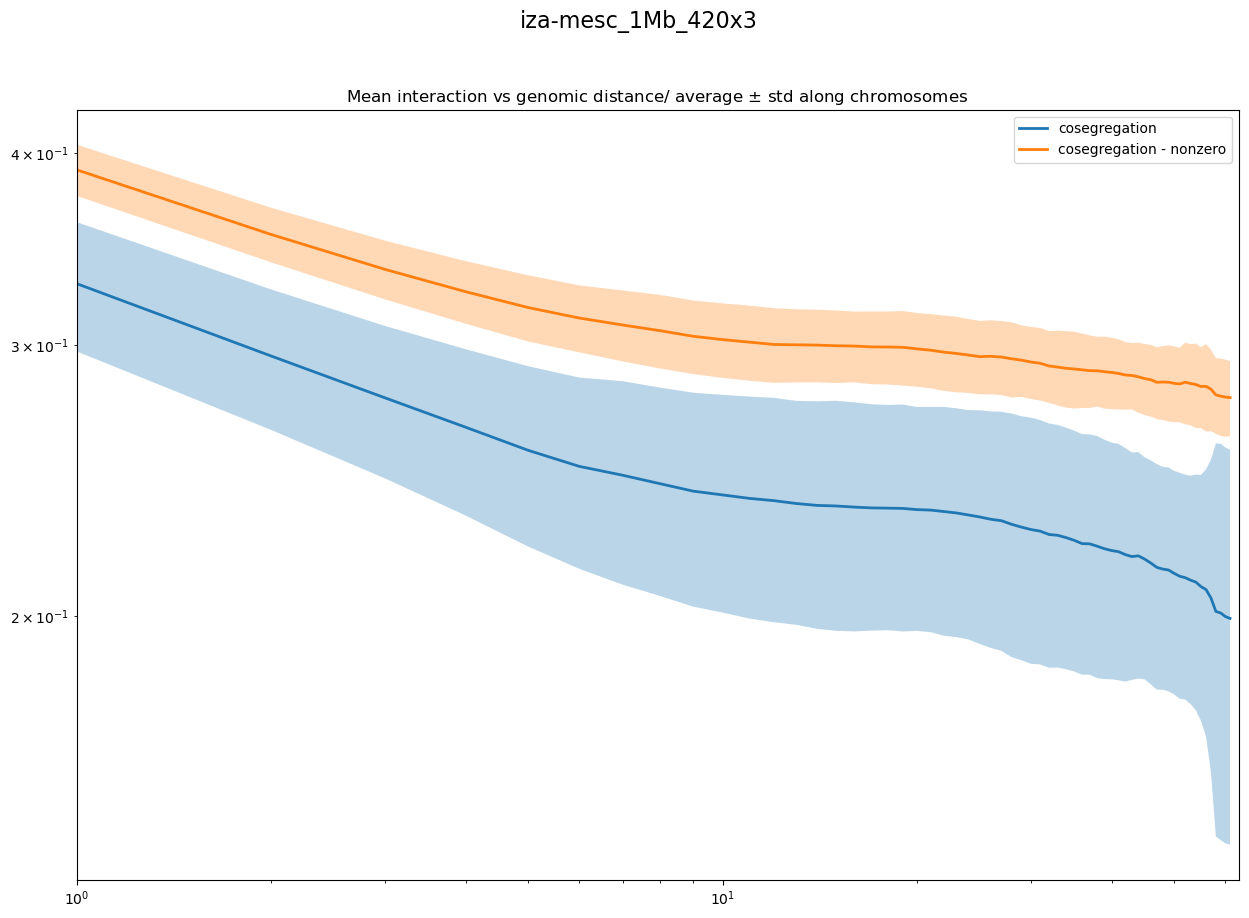

In [16]:
fig, ax = plt.subplots( figsize = (15, 10))
L_coseg = []
L_nld   = []
L_coseg_nonzero = []
L_nld_nonzero   = []

with warnings.catch_warnings():

    warnings.filterwarnings("ignore", "Mean of empty slice", category=RuntimeWarning)
    for i in range(n_chromosomes):
        
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]

        arr_1 = means_along_diagonals(gw_coseg_matrix_3NP[start_row:stop_row, start_row:stop_row])
        arr_2 = means_along_diagonals(gw_norm_link_disq_3NP[start_row:stop_row, start_row:stop_row])

        temp_1 = np.copy(gw_coseg_matrix_3NP[start_row:stop_row, start_row:stop_row])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_norm_link_disq_3NP[start_row:stop_row, start_row:stop_row])
        temp_2[temp_2== 0] = np.nan

        arr_3 = means_along_diagonals( temp_1 )
        arr_4 = means_along_diagonals( temp_2 )

        L_coseg.append(arr_1[:chr_windows_sizes[-1]])
        L_nld.append(arr_2[:chr_windows_sizes[-1]])
        L_coseg_nonzero.append(arr_3[:chr_windows_sizes[-1]])
        L_nld_nonzero.append(arr_4[:chr_windows_sizes[-1]])
        
        #gw_coseg_matrix_3NP[start_row:stop_row, start_column:stop_column].flatten()
    del temp_1, temp_2, arr_1, arr_2, arr_3, arr_4

    arr_coseg_3NP = np.array(L_coseg)
    arr_nld_3NP = np.array(L_nld)
    arr_coseg_nonzero_3NP = np.array(L_coseg_nonzero)
    arr_nld_nonzero_3NP = np.array(L_nld_nonzero)


    del L_coseg, L_nld, L_coseg_nonzero, L_nld_nonzero

    arr_coseg_mean_3NP, arr_coseg_std_3NP = np.nanmean(arr_coseg_3NP, axis = 0), np.nanstd(arr_coseg_3NP, axis = 0)
    arr_nld_mean_3NP, arr_nld_std_3NP = np.nanmean(arr_nld_3NP, axis = 0), np.nanstd(arr_nld_3NP, axis = 0)
    arr_coseg_mean_nonzero_3NP, arr_coseg_std_nonzero_3NP = np.nanmean(arr_coseg_nonzero_3NP, axis = 0), np.nanstd(arr_coseg_nonzero_3NP, axis = 0)
    arr_nld_mean_nonzero_3NP, arr_nld_std_nonzero_3NP = np.nanmean(arr_nld_nonzero_3NP, axis = 0), np.nanstd(arr_nld_nonzero_3NP, axis = 0)

    del arr_coseg_3NP, arr_nld_3NP, arr_coseg_nonzero_3NP, arr_nld_nonzero_3NP

ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_3NP, label = 'cosegregation', linewidth =2)
#ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_nld_mean_3NP, label = 'nld', linewidth =2)
ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_nonzero_3NP, label = 'cosegregation - nonzero', linewidth =2)
#ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_nld_mean_nonzero_3NP, label = 'nld - nonzero', linewidth =2)


ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_3NP - arr_coseg_std_3NP , arr_coseg_mean_3NP + arr_coseg_std_3NP , alpha = 0.3)
#ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_nld_mean_3NP - arr_nld_std_3NP , arr_nld_mean_3NP + arr_nld_std_3NP , alpha = 0.3 )
ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_nonzero_3NP - arr_coseg_std_nonzero_3NP , arr_coseg_mean_nonzero_3NP + arr_coseg_std_nonzero_3NP, alpha = 0.3)
#ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_nld_mean_nonzero_3NP - arr_nld_std_nonzero_3NP , arr_nld_mean_nonzero_3NP + arr_nld_std_nonzero_3NP, alpha = 0.3 )

ax.set_xscale('log');  ax.set_yscale('log')
ax.legend()

ax.set_xlim(1,63)
ax.set_title("Mean interaction vs genomic distance/ average $\pm$ std along chromosomes ");
#ax.set_ylim(4E-2,0.2)

fig.suptitle(name_root_3NP_1Mb, fontsize=16);

del arr_nld_mean_3NP, arr_nld_std_3NP, arr_nld_mean_nonzero_3NP, arr_nld_std_nonzero_3NP

NameError: name 'arr_nld_mean_3NP' is not defined

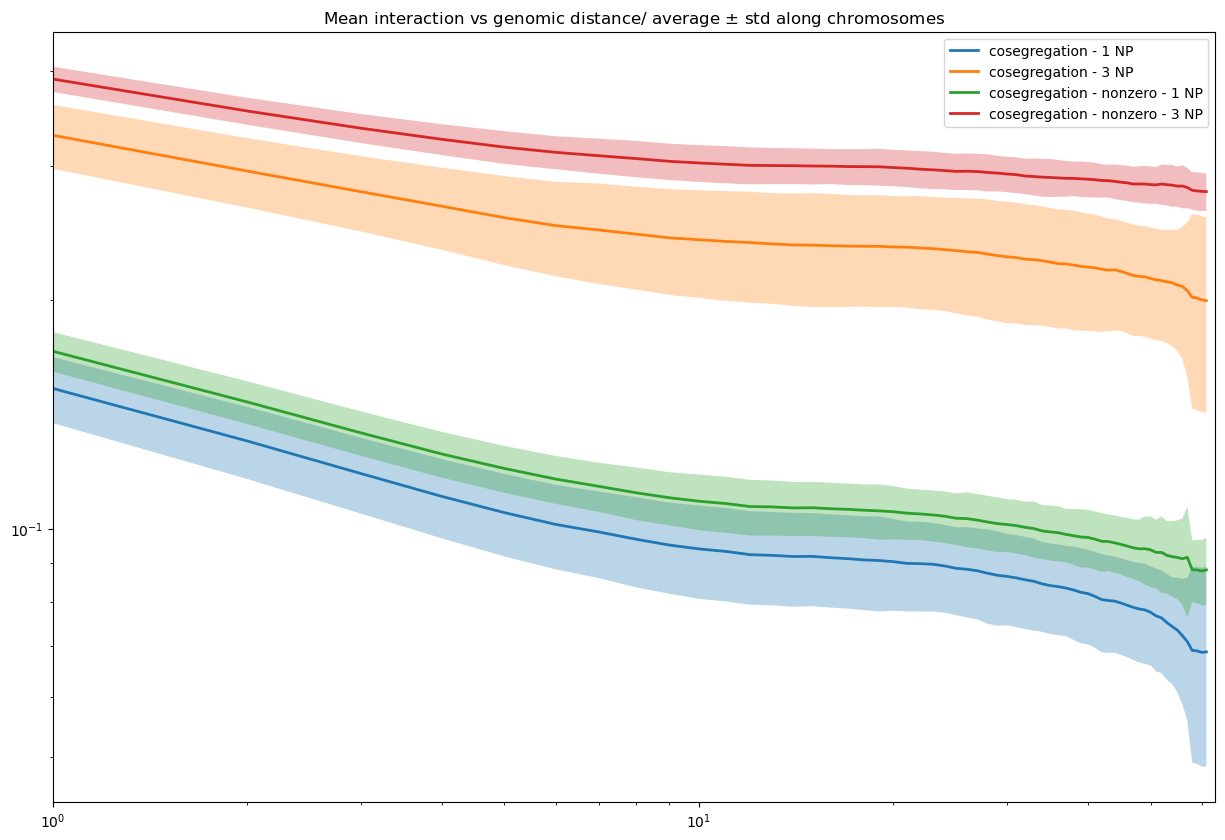

In [17]:
fig, ax = plt.subplots( figsize = (15, 10))

ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_1NP, label = 'cosegregation - 1 NP', linewidth =2)
ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_3NP, label = 'cosegregation - 3 NP', linewidth =2)
ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_nonzero_1NP, label = 'cosegregation - nonzero - 1 NP', linewidth =2)
ax.plot(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_nonzero_3NP, label = 'cosegregation - nonzero - 3 NP', linewidth =2)


ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_1NP - arr_coseg_std_1NP , arr_coseg_mean_1NP + arr_coseg_std_1NP , alpha = 0.3)
ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_3NP - arr_coseg_std_3NP , arr_coseg_mean_3NP + arr_coseg_std_3NP , alpha = 0.3)
ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_nonzero_1NP - arr_coseg_std_nonzero_1NP , arr_coseg_mean_nonzero_1NP + arr_coseg_std_nonzero_1NP, alpha = 0.3)
ax.fill_between(np.arange(0,chr_windows_sizes[-1], 1), arr_coseg_mean_nonzero_3NP - arr_coseg_std_nonzero_3NP , arr_coseg_mean_nonzero_3NP + arr_coseg_std_nonzero_3NP, alpha = 0.3)

ax.set_xscale('log');  ax.set_yscale('log')
ax.legend()

ax.set_xlim(1,63)
ax.set_title("Mean interaction vs genomic distance/ average $\pm$ std along chromosomes ");

L'andamento all'aumentare della distanza genomica è preservato passando da 1NP a 3NP, vuol dire che comunque una certa struttura dei dati è mantenuta anche su 3NP, ma forse non è il caso di andare oltre con questa analisi

________________

# Munnizza #

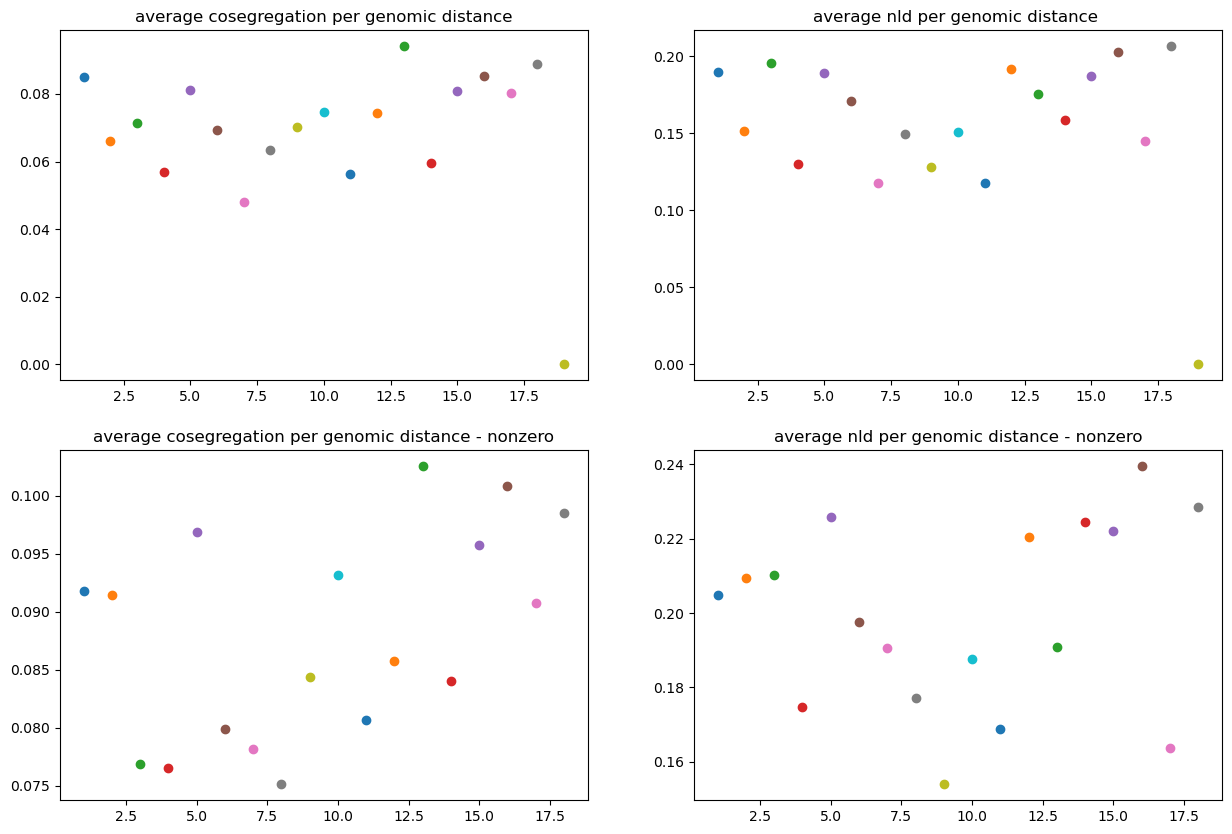

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows = 2, figsize = (15, 10))
with warnings.catch_warnings():

    warnings.filterwarnings("ignore", "Mean of empty slice", category=RuntimeWarning)
    for i in range(n_chromosomes):
        
        start_row    = np.sum(chr_windows_sizes[:i])
        stop_row     = start_row + chr_windows_sizes[i]

        arr_1 = means_along_diagonals(gw_coseg_matrix_1NP[start_row:stop_row, start_row:stop_row])
        arr_2 = means_along_diagonals(gw_norm_link_disq_1NP[start_row:stop_row, start_row:stop_row])

        temp_1 = np.copy(gw_coseg_matrix_1NP[start_row:stop_row, start_row:stop_row])
        temp_1[temp_1== 0] = np.nan
        temp_2 = np.copy(gw_norm_link_disq_1NP[start_row:stop_row, start_row:stop_row])
        temp_2[temp_2== 0] = np.nan

        arr_3 = means_along_diagonals( temp_1 )
        arr_4 = means_along_diagonals( temp_2 )

        ax[0,0].scatter((i + 1) , arr_1[60])
        ax[0,1].scatter((i + 1) , arr_2[60])
        ax[1,0].scatter((i + 1) , arr_3[60])
        ax[1,1].scatter((i + 1) , arr_4[60])
        
        #gw_coseg_matrix_1NP[start_row:stop_row, start_column:stop_column].flatten()
    del temp_1, temp_2

ax[0,0].set_title("average cosegregation per genomic distance", fontsize = 16); ax[0,1].set_title("average nld per genomic distance ", fontsize = 16); ax[1,0].set_title("average cosegregation per genomic distance - nonzero", fontsize = 16); ax[1,1].set_title("average nld per genomic distance - nonzero", fontsize = 16);
